# 군집화(Clustering)
- 비지도 학습으로 정닶없이 특징만 가지고, 보유한 데이터로 모델을 구현
- 분류를 하는 이유는 객관식의 정답을 만들기 위해서

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("../Data/student_kmeans.csv")
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


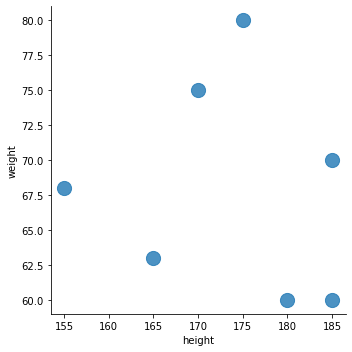

In [3]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={"s":200}
)
plt.show()


### k-Means 군집화
- 군집화 종류는 엄청 많지만 k-Means가 가장 많이 쓰임

In [4]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [5]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    # clustering을 3가지로 하겠다
    n_clusters=3
).fit(data_points)

In [6]:
# 각 군집의 중심 위치(분류된값의 중심지)
# _ 가 있는 변수들은 다 시스템에서 만든 변수임!
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [160.        ,  65.5       ],
       [172.5       ,  77.5       ]])

In [7]:
# 어느 군집에 속해있다.
kmeans.labels_

array([0, 0, 0, 1, 1, 2, 2], dtype=int32)

In [8]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,1
4,155,68,1
5,170,75,2
6,175,80,2


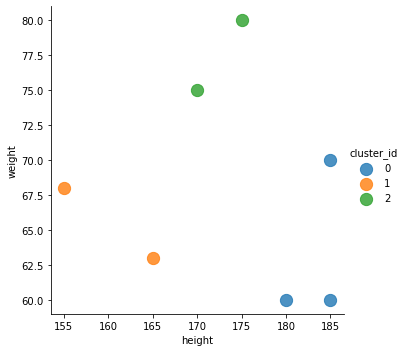

In [9]:
# 시각화
sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={"s":150},
    hue="cluster_id"
)
plt.show()

---
# IRIS 군집화 비교


In [10]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Name를 숫자로 변환하기
iris['label'] = iris["Name"].map({'Iris-setosa':0, "Iris-versicolor":1, "Iris-virginica":2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## k-Means군집화

In [13]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [15]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


# 시각화 해보기
cluster id의 일련번호가 틀리게 나올수 있으므고 시각화를 통한 확인이 필요

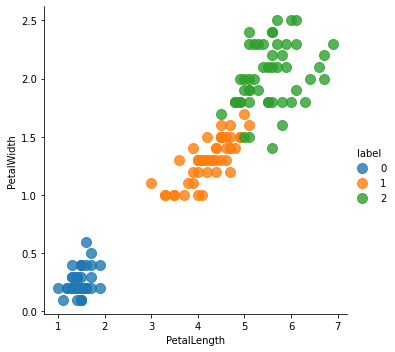

In [18]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={"s":100},
    hue="label"
)
plt.show()

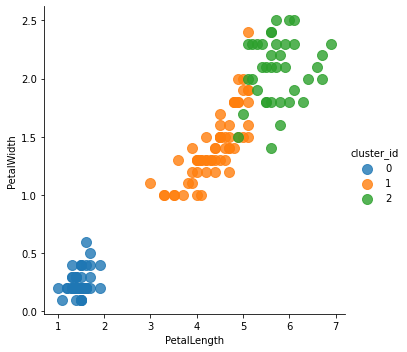

In [19]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={"s":100},
    hue="cluster_id"
)
plt.show()

In [ ]:
# 값의 순서가 달라지면 바꾸는 방법
# iris['Cluster_id2'] = iris["cluster_id"].map({0:2, 1:0, 2:1})

In [20]:
sum(iris['label']== iris['cluster_id']) / len(iris)

0.8933333333333333

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id)

0.8933333333333333